# Keras
资料: Keras中文文档

Find命令 find dirname -name filename
http://www.cnblogs.com/huninglei/p/5824205.html

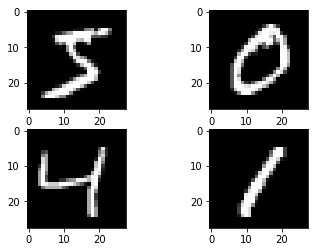

In [2]:
# 从keras datasets 中下载 mnist，但不适用于没有翻墙软件的同学
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
# 完整地训练MNIST数据，但是需要...翻墙
from keras.models import Sequential  
from keras.layers.core import Dense, Dropout, Activation  
from keras.optimizers import SGD  
from keras.datasets import mnist  
import numpy as np

model = Sequential()  
model.add(Dense(500, input_shape=(784,), init='glorot_uniform')) # 输入层，28*28=784  
model.add(Activation('tanh')) # 激活函数是tanh  
model.add(Dropout(0.5)) # 采用50%的dropout

model.add(Dense(500,init='glorot_uniform')) # 隐层节点500个  
model.add(Activation('tanh'))  
model.add(Dropout(0.5))

model.add(Dense(10, init='glorot_uniform')) # 输出结果是10个类别，所以维度是10  
model.add(Activation('softmax')) # 最后一层用softmax

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) # 设定学习率（lr）等参数  
model.compile(loss='categorical_crossentropy', optimizer=sgd) # 使用交叉熵作为loss函数
#model.compile(loss='categorical_crossentropy', optimizer=sgd, class_mode='categorical') # 使用交叉熵作为loss函数

(X_train, y_train), (X_test, y_test) = mnist.load_data() # 使用Keras自带的mnist工具读取数据（第一次需要联网）

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]) # 由于mist的输入数据维度是(num, 28, 28)，这里需要把后面的维度直接拼起来变成784维  
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])  
Y_train = (np.arange(10) == y_train[:, None]).astype(int) # 参考上一篇文章，这里需要把index转换成一个one hot的矩阵  
Y_test = (np.arange(10) == y_test[:, None]).astype(int)

# 开始训练，这里参数比较多。batch_size就是batch_size，nb_epoch就是最多迭代的次数， shuffle就是是否把数据随机打乱之后再进行训练
# verbose是屏显模式，官方这么说的：verbose: 0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch.
# 就是说0是不屏显，1是显示一个进度条，2是每个epoch都显示一行数据
# show_accuracy就是显示每次迭代后的正确率
# validation_split就是拿出百分之多少用来做交叉验证
model.fit(X_train, Y_train, batch_size=200, nb_epoch=100, shuffle=True, verbose=1, validation_split=0.3)  
print ('test set')  
model.evaluate(X_test, Y_test, batch_size=200, show_accuracy=True, verbose=1)  

/home/jackie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, input_shape=(784,), kernel_initializer="glorot_uniform")`
  if __name__ == '__main__':
/home/jackie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, kernel_initializer="glorot_uniform")`
  del sys.path[0]
/home/jackie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="glorot_uniform")`
/home/jackie/anaconda3/lib/python3.6/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 7s 162us/step - loss: 1.2025 - val_loss: 0.5337
Epoch 2/100
42000/42000 [==============================] - 6s 154us/step - loss: 0.9500 - val_loss: 0.5075
Epoch 3/100
42000/42000 [==============================] - 6s 153us/step - loss: 0.8659 - val_loss: 0.4654
Epoch 4/100
42000/42000 [==============================] - 6s 154us/step - loss: 0.8410 - val_loss: 0.4538
Epoch 5/100
42000/42000 [==============================] - 7s 158us/step - loss: 0.7845 - val_loss: 0.4279
Epoch 6/100
42000/42000 [==============================] - 7s 168us/step - loss: 0.7428 - val_loss: 0.4106
Epoch 7/100
42000/42000 [==============================] - 7s 171us/step - loss: 0.7093 - val_loss: 0.4061
Epoch 8/100
32200/42000 [======================>.......] - ETA: 1s - loss: 0.7182

In [1]:
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

np.random.seed(123)

/home/jackie/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


test_data lenght:  10000
training_data lenght:  50000
validation_data lenght:  10000
data_shape (784,)
training_data: 
 (array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([5, 0, 4, ..., 8, 4, 8]))


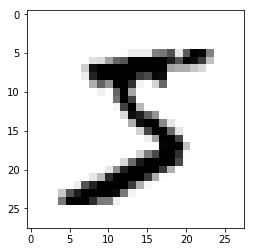

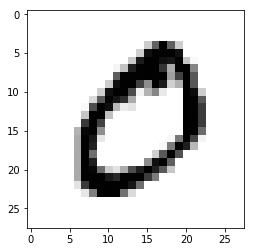

In [29]:
# 使用Python3 做MNIST手写数字识别
# mnist.pkl.gz 下载地址 http://deeplearning.net/data/mnist/mnist.pkl.gz
import numpy as np
import struct
import os
import matplotlib.pyplot as plt

import pickle
import gzip

def outImg(training_data, order):
    """
    根据指定的order来获取集合中对应的图片和标签
    """
    image = np.array(training_data[0][order])
    image = image.reshape(28,28)
    label = (training_data[1][order])
    plt.figure()
    plt.imshow(image, cmap="gray_r") # 在MNIST官网中有说道 “Pixel values are 0 to 255. 
    # 0 means background (white), 255 means foreground (black).”
    plt.show()
    #outfile = str(order) + '_'+str(label) + '.png'
    #plt.savefig("./" + outfile) #保存图片

def test_pickle():
    filename = '../Downloads/mnist.pkl.gz'
    with gzip.open(filename, 'rb') as fid:
        training_data, validation_data, test_data = pickle.load(fid, encoding='bytes')
    print ('test_data lenght: ', len(test_data[0]))
    print ('training_data lenght: ', len(training_data[0]))
    print ('validation_data lenght: ', len(validation_data[0]))
    print('data_shape', training_data[0][0].shape)
    print('training_data: \n', training_data)
    # traning_data[0]是图片数据，training_data[1]是相应的label,
    for i in range(2):
        outImg(training_data, i)
    
test_pickle()

参考这篇文章实现MNIST手写数字识别 https://zhuanlan.zhihu.com/p/31445414

# 第二个实现博客
出处:http://blog.csdn.net/sunyangwei1993/article/details/73998297?locationNum=8&fps=1

# 第三个实现博客
https://www.cnblogs.com/yqtm/p/6924939.html

In [1]:
# 导入需要的包, Sequential()是最简单的模型——序贯模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.datasets import mnist
import numpy as np

# 搭建网络
model = Sequential()
model.add(Dense(500,input_shape=(784,))) #输入层， 28*28=784
model.add(Activation('tanh'))
model.add(Dropout(0.5)) #50% dropout

model.add(Dense(500)) #隐藏层， 500
model.add(Activation('tanh'))
model.add(Dropout(0.5)) #50% dropout

model.add(Dense(10)) #输出结果， 10
model.add(Activation('softmax'))
# 详解
# 通过model.add()增加模型的层数。其中Dense()设定该层的结构，第一个参数表示输出的个数，
# 第二个参数是接受的输入数据的格式。第一层中需要指定输入的格式，在之后的增加的层中输入层
# 节点数默认是上一层的输出个数。Actication()指定激活函数，Dropout()指定每层要丢掉的
# 节点信息百分比。输出层激活函数一般为softmax，不需要丢弃节点。

# 编译模型
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #设定学习效率等参数
model.compile(loss = 'categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) #使用交叉熵作为loss
# 详解
# 使用优化器sgd来编译模型，用来指定学习效率等参数。编译时指定loss函数，这里使用交叉熵函数作为loss函数。
# 交叉熵的loss函数旨在最大化正确类的模型置信度,不关心其他类的概率分布
# metrics 用来展示训练的acc正确率

# 读取数据
(x_train,y_train),(x_test,y_test) = mnist.load_data() #使用mnist读取数据（第一次需要下载）

X_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
#将index转换橙一个one_hot矩阵(有两种方法,第一种更加高明)
Y_train = (np.arange(10) == y_train[:,None]).astype(int) 
Y_test = (np.arange(10) == y_test[:,None]).astype(int)
#转换为one_hot矩阵的第二种方法
'''
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
'''
# 详解
# 读取minst数据集，通过reshape()函数转换数据的格式。
# 如果我们打印x_train.shape会发现它是(60000,28,28)，即一共60000个数据，每个数据
# 是28*28的图片。通过reshape转换为(60000,784)的线性张量。
# 如果我们打印y_train会发现它是一组表示每张图片的表示数字的数组，通过numpy的arange()
# 和astype()函数将每个数字转换为一组长度为10的张量，代表的数字的位置是1，其它位置为0.

# 对使用转换后的数据对模型进行训练
history = model.fit(X_train,Y_train,batch_size=200,epochs=10,shuffle=True,verbose=1,validation_split=0.3)
# model.save('MNIST.h5')  #保存网络结构
# 详解
# 其中，batch_size表示每个训练块包含的数据个数，epochs表示训练的次数，shuffle表示是
# 否每次训练后将batch打乱重排，verbose表示是否输出进度log，
# validation_split指定验证集占比,这里验证集占比30%

# 输出对测试集进行测试的结果
print("test set")
loss_and_metrics = model.evaluate(X_test,Y_test,batch_size=200,verbose=1)
print("")
print("The test loss is: " + loss_and_metrics[0])
print("The test metrics['accuracy'] is: " + loss_and_metrics[1])
# metrics是指标列表, 在前面的函数中我们设置为metrics=['accuracy']

#有另外一种手动测accuracy的方法
'''
result = model.predict(X_test,batch_size=200,verbose=1)

result_max = np.argmax(result, axis = 1)
test_max = np.argmax(Y_test, axis = 1)

result_bool = np.equal(result_max, test_max)
true_num = np.sum(result_bool)
print("")
print("The accuracy of the model is %f" % (true_num/len(result_bool)))
'''
# 详解
# model.evaluate()计算了测试集中的识别的loss值。
# 通过model.predict()，我们可以得到对于测试集中每个数字的识别结果，每个数字对应一个表示每个数字都是多少概率的长度为10的张量。
# 通过np.argmax()，我们得到每个数字的识别结果和期望的识别结果
# 通过np.equal()，我们得到每个数字是否识别正确
# 通过np.sum()得到识别正确的总的数字个数

/home/jackie/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 157us/step - loss: 1.2410 - acc: 0.5747 - val_loss: 0.5758 - val_acc: 0.8191
Epoch 2/10
42000/42000 [==============================] - 7s 175us/step - loss: 1.0154 - acc: 0.6520 - val_loss: 0.5441 - val_acc: 0.8371
Epoch 3/10
42000/42000 [==============================] - 7s 166us/step - loss: 0.8936 - acc: 0.6953 - val_loss: 0.4787 - val_acc: 0.8514
Epoch 4/10
42000/42000 [==============================] - 6s 146us/step - loss: 0.8283 - acc: 0.7174 - val_loss: 0.4516 - val_acc: 0.8591
Epoch 5/10
42000/42000 [==============================] - 7s 156us/step - loss: 0.7764 - acc: 0.7414 - val_loss: 0.4325 - val_acc: 0.8676
Epoch 6/10
42000/42000 [==============================] - 6s 141us/step - loss: 0.7522 - acc: 0.7483 - val_loss: 0.4077 - val_acc: 0.8764
Epoch 7/10
42000/42000 [==============================] - 6s 147us/step - loss: 0.7310 - acc: 0.7564 - val_loss: 0.4172 - 

In [26]:
x = [i for i in range(10)]
x = np.array(x)
print(x)
print(x.T) # 列向量和行向量打印出来是一样的,因为是一维数组
print(x[:,None])  #严格的说,这个是二维向量
print(x[:,None, None])
print(x[:,None, None].shape)
x[:,None].astype(int)
x.dtype

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[[0]]

 [[1]]

 [[2]]

 [[3]]

 [[4]]

 [[5]]

 [[6]]

 [[7]]

 [[8]]

 [[9]]]
(10, 1, 1)


dtype('int64')

# MNIST 笔记

参考了：https://zhuanlan.zhihu.com/p/31445414

首先需要了解Keras的两类模型：序贯模型和函数式模型。

序贯模型是多个网络层的线性堆叠，也就是“一条路”走到黑。好处是快，缺点是不灵活。
函数式模型则可以支持多条路径，可以实现更复杂的网络。

二者的共同点都是Model，Model对象是由Layer对象组成。所有的Layer对象接受一个张量作为输入，也都输出一个张量。构建所有的模型都要经历如下几步：

定义结构，也就是定义每一个层对象，并加入到模型中
编译模型，这一步主要是将模型转为计算图，complie有三个参数：优化器，损失函数和指标列表。
训练模型，fit函数需要指定训练集的x和y，以及训练轮数和mini-batch的大小
保存权值以及保存网络结构（可选）
使用模型，例如评估，对新数据进行预测等
关于模型以及层的API可以查看官方文档，接下来的例子中会使用一部分：
